# Imports

In [9]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
from collections import Counter

# Dataframe

In [6]:
df =pd.read_csv('C:/Users/gabri/Documents/UFC/21.1/MD/atividade 1/ingredients v1.csv')

In [8]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
0,AVphBRHOilAPnD_x0OrE,B00HXST15C,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery",2017-01-07T20:13:17Z,2017-06-30T16:48:02Z,41642026706,Ingredients,"Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,33829,Simon Fischer Fruit Bttr Prune Lekvar,NaN,41642026706,10.6 pounds,NaN
1,AVpfNFy1LJeJML434ma2,"B008VT0W8C,B0092F8OJ8",McCormick,"Grocery & Gourmet Food,Food,Grocery",2016-02-05T21:08:01Z,2017-04-12T13:54:04Z,52100018164,Ingredients,"Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",MCLANE500373852,McCORMICK GRILL MATES MOLASSES BACON SEASONING...,NaN,52100018164,3.5 ounces,NaN
2,AVpgT49VLJeJML43MJEz,B00CHTWZ2S,Jolly Time,"Grocery & Gourmet Food,Grocery",2014-02-18T01:51:23Z,2017-08-07T16:32:11Z,70670004141,Ingredients,"Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,NaN,Jolly Time Popcorn,NaN,70670004141,1.8 pounds,NaN
3,AVphYgnzLJeJML43aPp2,B002JJYNVW,Ziyad,"Grocery & Gourmet Food,grocery",2014-11-04T11:39:27Z,2017-09-04T05:10:37Z,NaN,Ingredients,Mechanically hulled seasame seeds.Allergy Info...,Ziyad,NaN,Ziyad Tahini Sesame Sauce,NaN,74265001560,1.6 pounds,NaN
4,AVpiS0bOLJeJML43kRsh,B00290W1CY,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",2014-02-18T02:32:12Z,2017-08-26T01:45:28Z,"723,929,530,040,072,000,000,000",Ingredients,FALSE,Fla-Vor-Ice,NaN,Fla-Vor-Ice Plus Giant Pops,NaN,"72,392,952,335,072,300,000,000",18 pounds,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   asins               6286 non-null   object 
 2   brand               9114 non-null   object 
 3   categories          10000 non-null  object 
 4   dateAdded           10000 non-null  object 
 5   dateUpdated         10000 non-null  object 
 6   ean                 6370 non-null   object 
 7   features.key        10000 non-null  object 
 8   features.value      9972 non-null   object 
 9   manufacturer        7313 non-null   object 
 10  manufacturerNumber  6266 non-null   object 
 11  name                9999 non-null   object 
 12  sizes               260 non-null    object 
 13  upc                 8118 non-null   object 
 14  weight              6390 non-null   object 
 15  Unnamed: 15         0 non-null      float64
dtypes: fl

# Tratando os dados do dataframe

#### Removendo dados NaN da coluna brand

In [5]:
df['brand'].isna().sum()

886

In [6]:
df['brand'].describe()

count          9114
unique         3143
top       Goya Food
freq             77
Name: brand, dtype: object

In [7]:
df.loc[df['brand'].isna()].head(5)

,id,asins,brand,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
168,AVpgBSJ51cnluZ0-vJmU,NaN,NaN,"Food,Grocery",2016-11-07T19:24:44Z,2016-11-07T19:24:44Z,NaN,Ingredients,"Pistachios,Salt.",Paramount Farms,072142WTA,Wonderful Pistachios Roasted & Salted Pistachi...,NaN,14113910040,NaN,NaN
169,AVphnes71cnluZ0-Ee3B,NaN,NaN,"Food,Grocery",2016-11-04T02:06:16Z,2016-11-04T02:06:16Z,41224725027,Ingredients,Basmati Rice.,BRUNO SCHEIDT INC,72502,"Roland Basmati Rice, 35.27 Oz",NaN,41224725027,NaN,NaN
173,AVphrhNQ1cnluZ0-FMGS,NaN,NaN,"Food,Grocery",2017-01-07T20:11:30Z,2017-01-07T20:11:30Z,NaN,Ingredients,"Contains: Paprika,Cumin,Cayenne Pepper,Garlic,...",MORTON & BASSETT,44188,Ssnng Chili Pwdr,NaN,16291441880,NaN,NaN
174,AVpgSVOZLJeJML43LxeZ,NaN,NaN,"Food,Grocery",2016-11-07T00:31:53Z,2016-11-07T00:31:53Z,41420126529,Ingredients,"Sucrose,Corn Syrup,Artificial Flavor,Acacia (G...",Ferrara,MCLANE500744698,"Red Hots Cinnamon Flavored Candy, 6 Oz",NaN,41420126529,NaN,NaN
175,AVpfhPDK1cnluZ0-mMXG,NaN,NaN,"Food,Grocery",2016-10-28T01:45:41Z,2016-10-28T01:45:41Z,73621003033,Ingredients,"For Pez Candy (Except Chocolate),: Sugar,Corn ...",Pez,113241,Pez Candy & Dispenser,NaN,73621003033,NaN,NaN


In [8]:
# Substituindo os valores NaN da coluna brand pelo valor mais frenquente 'Goya Food'.
df_brand = df
df_brand.loc[df_brand['brand'].isna()] = 'Goya Food'
df_brand

,id,asins,brand,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
0,AVphBRHOilAPnD_x0OrE,B00HXST15C,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery",2017-01-07T20:13:17Z,2017-06-30T16:48:02Z,41642026706,Ingredients,"Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,33829,Simon Fischer Fruit Bttr Prune Lekvar,NaN,41642026706,10.6 pounds,NaN
1,AVpfNFy1LJeJML434ma2,"B008VT0W8C,B0092F8OJ8",McCormick,"Grocery & Gourmet Food,Food,Grocery",2016-02-05T21:08:01Z,2017-04-12T13:54:04Z,52100018164,Ingredients,"Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",MCLANE500373852,McCORMICK GRILL MATES MOLASSES BACON SEASONING...,NaN,52100018164,3.5 ounces,NaN
2,AVpgT49VLJeJML43MJEz,B00CHTWZ2S,Jolly Time,"Grocery & Gourmet Food,Grocery",2014-02-18T01:51:23Z,2017-08-07T16:32:11Z,70670004141,Ingredients,"Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,NaN,Jolly Time Popcorn,NaN,70670004141,1.8 pounds,NaN
3,AVphYgnzLJeJML43aPp2,B002JJYNVW,Ziyad,"Grocery & Gourmet Food,grocery",2014-11-04T11:39:27Z,2017-09-04T05:10:37Z,NaN,Ingredients,Mechanically hulled seasame seeds.Allergy Info...,Ziyad,NaN,Ziyad Tahini Sesame Sauce,NaN,74265001560,1.6 pounds,NaN
4,AVpiS0bOLJeJML43kRsh,B00290W1CY,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",2014-02-18T02:32:12Z,2017-08-26T01:45:28Z,"723,929,530,040,072,000,000,000",Ingredients,FALSE,Fla-Vor-Ice,NaN,Fla-Vor-Ice Plus Giant Pops,NaN,"72,392,952,335,072,300,000,000",18 pounds,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVpfVL3ailAPnD_xZyHc,"B00BHNV8N2,B06XC7GXCD",Wright's,"Barbecue,Grocery & Gourmet Food,Sauces, Gravie...",2015-11-06T02:16:34Z,2017-09-11T20:56:25Z,7.99475E+11,Ingredients,"water,natural hickory smoke flavor.",Wright's,NaN,Wright's Liquid Smoke - 3.5 Oz,NaN,7.99475E+11,4.8 ounces,NaN
9996,AVpgK5BZilAPnD_xofxu,B00HZO4YYW,Eden Foods,"Food,Snacks, Cookies & Chips,Nuts & Trail Mixe...",2015-05-11T14:18:27Z,2017-09-04T22:07:55Z,24182001921,Ingredients,"Organic Dry Roasted Almonds,Organic Tamari Soy...",Eden Foods,1418904,Eden Foods Organic Pocket Snacks - Tamari Almo...,NaN,24182001921,NaN,NaN
9997,AV00srHj-jtxr-f30m1M,"B01FRJ0XKA,B01IV1D1VY",Happy Belly,"Cashews,Grocery & Gourmet Food,Cooking & Bakin...",2017-07-12T02:48:32Z,2017-09-07T18:32:54Z,8.4171E+11,Ingredients,"Cashews, Vegetable Oil (May Contain One Or Mor...",AFS Brands LLC,NaN,"Happy Belly Fancy Whole Cashews, 44 Ounce",NaN,"841,710,126,198,841,000,000,000",2.8 pounds,NaN
9998,AVpfmY4RLJeJML43ANr-,"B000PWIR7Q,B005ER1C6U",Quaker,"Food,Snacks, Cookies & Chips,Rice Cakes,Chips,...",2015-08-24T21:44:06Z,2017-09-18T23:01:44Z,30000169766,Ingredients,"Whole Grain Brown Rice Flour,Degerminated Mill...",Quaker Oats,16976,QuakerÂ® PoppedÂ® Cheddar Cheese Rice Crisps 6...,NaN,30000169766,4.3 lbs,NaN


In [9]:
df['brand'].isna().sum()

0

#### Tratando coluna de ingrediente

In [26]:
ingredients = str(df['features.value'].unique())
ingredients = ingredients.replace('\n','')

In [27]:
ingredients = ingredients.split(',')
ingredients

["['Dried Prunes",
 'Water',
 'Corn Syrup',
 'Sugar',
 "Pectin.' 'Salt",
 'Sugar',
 'Molasses (Refinery Syrup',
 ' Molasses',
 ' Caramel Color)',
 'Spices (Including Black Pepper)',
 'Garlic Onion',
 'Tapioca Maltodextrin',
 'Bacon Fat and Cooked Bacon (Cured with Water',
 ' Salt',
 ' Sodium Erythorbate',
 ' Sodium Nitrate)',
 'Silicon Dioxide (To Make Free Flowing)',
 'Autolyzed Yeast',
 'Sunflower Oil',
 'Corn Maltodextrin',
 'Vinegar',
 'Extractives of Paprika',
 "and Natural Flavor (Including Smoke)' 'Salt",
 ' Yellow 5 Lake',
 " Tricalcium Phosphate And Artificial Butter Flavor' ... 'Cashews",
 ' Vegetable Oil (May Contain One Or More Of The Following: Peanut',
 ' Canola',
 ' Sunflower And/Or Soybean Oil)',
 ' Sea Salt.',
 'Cashews',
 'Vegetable Oil (May Contain One Or More Of The Following: Peanut',
 ' Canola',
 ' Sunflower And/Or Soybean Oil)',
 "Sea Salt.' 'Whole Grain Brown Rice Flour",
 'Degerminated Milled Corn',
 'Sunflower Oil',
 'Dry Whey',
 'Salt',
 'Maltodextrin',
 'Che

In [10]:
df_ingredients = df

In [11]:
df_ingredients.dropna(subset = ["features.value"], inplace=True)

# Perguntas

## 1 - Quantas e quais marcas de produtos contidas no dataset?

In [14]:
total_brands = len(df_brand['brand'].unique())
print("O total de marcas de produtos é de {}".format(total_brands))

O total de marcas de produtos é de 3129


In [15]:
brands = list(df_brand['brand'].unique())
for i in range(0,len(brands)):
    print("{}: {}".format(i,brands[i]))

0: Simon Fischer
1: McCormick
2: Jolly Time
3: Ziyad
4: Fla-Vor-Ice
5: Hero
6: Simply Asia
7: EMERIL S
8: Back to Nature
9: Nutrament
10: kikkoman
11: Blue Diamond
12: STELLA D'ORO
13: Badia
14: Tones
15: Ferrara Candy Company
16: Cornnuts
17: Planters
18: Bob Evans
19: Tone's
20: Nature's Path
21: Spice Islands
22: Kernel Season's
23: Iberia
24: Goya Food
25: Badia Spice
26: Morton & Bassett
27: Crown Prince
28: Cento
29: Williams
30: Marco Polo
31: Bionaturae
32: Lay's
33: Maggi
34: Polaner
35: Simply Organic
36: Coffee-Mate
37: Kellogg's
38: KA-ME
39: Jelly Belly
40: Manischewitz
41: Mentos
42: Streit's
43: Orale!
44: Fiordifrutta
45: Old Wessex Ltd.
46: Dickinson's
47: RiceSelect
48: De Cecco
49: SAM MILLS
50: Golden Mountain
51: Polaner All Fruit
52: Taste of Thai
53: Chilli Man
54: Bonne Maman
55: Baycliff
56: Nature's Earthly Choice
57: Redmond
58: Chicken of the Sea
59: FRENCHS
60: Alessi
61: Frito-Lay
62: MCCORMICK CALIFORNIA STYLE
63: Kozy Shack
64: SUPER SEEDZ
65: Dry-Spice


1626: Pure Growth
1627: Klondike
1628: GoNaturally
1629: Cadbury Fingers
1630: Sweetworks
1631: Real Foods
1632: Miwa Somen Konishi
1633: Toyo Suisan
1634: Telma
1635: Munchies
1636: WAY BETTER SNACKS
1637: SkinnyPop
1638: Primizie
1639: Ari Global
1640: Stretch Island
1641: Ferrara Pan
1642: OUTSHINE
1643: Frontera
1644: Salpica
1645: Dum-dums
1646: ORGANIC COFFEE
1647: Imperial Organic
1648: Crispy Green
1649: Suchard
1650: Victor Allen's Coffee
1651: Pop Secret
1652: Dalmatia
1653: Black Jewell Popcorn
1654: Conte's
1655: Buff Bake
1656: Chiclets
1657: YANKEETRADERS
1658: Keebler Right Bites
1659: Otsuka Foods
1660: Our house cymene
1661: MaruSakae milling
1662: Glico
1663: Power Bar
1664: Mezetta
1665: Nesquik
1666: Wardley
1667: Martha WhiteÂ®
1668: Terra
1669: Wellaby's
1670: Field ï¿½ï¿½rï¿½ï¿½Men
1671: Postamble
1672: Inaniwa Korai-do
1673: Miura food
1674: Leonard Mountain
1675: Krunchy Melts
1676: Coco Wheats
1677: UNIQUE PRETZEL
1678: Sun of Italy
1679: Barnie's Coffee Kitch

2888: Zinke Orchards
2889: Mr. Clean
2890: Nissin Demae
2891: ZonePerfect
2892: Spicy World
2893: Le Saunier De Camargue
2894: NewGem Foods
2895: all
2896: Powerbar
2897: Nature Botanical Farms
2898: DecoPro
2899: Yogourmet
2900: Nunaturals
2901: Universal Nutrition
2902: Wholeome Sweeteners
2903: Urbani
2904: Stirrings
2905: ECOTEAS
2906: Think Products
2907: Black Forest
2908: DaVinci
2909: Health King Balanceuticals Group
2910: Date Lady
2911: Maple
2912: Skyline Chili
2913: Classico
2914: Skinner
2915: Itsumo
2916: Jim's Cheese Pantry, Inc.
2917: d-CON
2918: Takis Fuego
2919: Inaba peanut
2920: Ajax
2921: Bagel Spice
2922: PETER RABBIT
2923: La Tourangelle
2924: LÃ„RABAR
2925: O-Ke-Doke
2926: Vic's
2927: Nancy's (Springfield Creamery)
2928: Festival
2929: LonoLife
2930: Charles Jacquin-St.Dalfour
2931: Joyva
2932: Stacy's Snacks
2933: Kenwood
2934: Cucina & Amore
2935: Napa Valley Naturals
2936: Child Life
2937: Davidson's Tea
2938: Superfruit
2939: Natures Earthly Choice
2940: Daw

## 2 - Quais as marcas que aparecem mais no dataset? Quais aparecem menos?

In [16]:
df_brand['brand'].value_counts()

Goya Food               963
Roland                   75
CVS Gold Emblem          75
Bob's Red Mill           71
Smart Sense              70
                       ... 
Wind Willow               1
PASTA CHIPS               1
Southern Breeze           1
Salem Baking Company      1
Barbaras Bakery           1
Name: brand, Length: 3129, dtype: int64

In [17]:
brand_frequency = df_brand.groupby('brand').count()
brand_frequency.reset_index(inplace=True)
brand_frequency.head(5)

,brand,id,asins,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
0,1/2/2003,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0
1,100 Grand,3,2,3,3,3,1,3,3,1,1,3,0,3,2,0
2,18 Rabbits,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0
3,21st Century,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0
4,3 Ballerina Tea,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0


In [18]:
most_frequent_brands = brand_frequency.nlargest(10,'id')
most_frequent_brands.reset_index(inplace=True)
most_frequent_brands

,index,brand,id,asins,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
0,1123,Goya Food,963,892,963,963,963,951,963,963,962,937,963,886,963,890,886
1,410,CVS Gold Emblem,75,0,75,75,75,1,75,75,0,0,75,0,0,73,0
2,2370,Roland,75,64,75,75,75,69,75,75,69,71,75,1,73,59,0
3,315,Bob's Red Mill,71,60,71,71,71,55,71,71,58,56,71,14,66,53,0
4,2548,Smart Sense,70,0,70,70,70,46,70,70,3,70,70,0,70,0,0
5,263,Betty Crocker,61,30,61,61,61,51,61,61,41,48,61,0,61,30,0
6,1742,McCormick,56,46,56,56,56,45,56,56,50,46,56,0,56,43,0
7,1447,Kellogg's,53,33,53,53,53,39,53,53,39,44,53,0,52,35,0
8,299,Black Tie Mercantile,51,51,51,51,51,3,51,51,1,0,51,0,50,51,0
9,2903,Utz,51,7,51,51,51,38,51,51,50,45,51,0,51,10,0


In [19]:
print("As 10 empresas que mais aparecem no dataset são:\n")
for i in range(0,10):
    print("{} {}: {}".format(i+1,
                             most_frequent_brands['brand'][i],
                             most_frequent_brands['id'][i]))

As 10 empresas que mais aparecem no dataset são:

1 Goya Food: 963
2 CVS Gold Emblem: 75
3 Roland: 75
4 Bob's Red Mill: 71
5 Smart Sense: 70
6 Betty Crocker: 61
7 McCormick: 56
8 Kellogg's: 53
9 Black Tie Mercantile: 51
10 Utz: 51


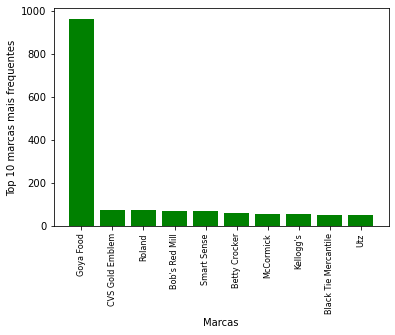

In [20]:
brands = [brand for brand in most_frequent_brands['brand']]

plt.bar(brands, most_frequent_brands['id'], color='green')
plt.xticks(brands, rotation='vertical', size=8)
plt.xlabel("Marcas")
plt.ylabel("Top 10 marcas mais frequentes")
plt.show()

In [21]:
least_frequent_brands = brand_frequency.nsmallest(10,'id')
least_frequent_brands.reset_index(inplace=True)
least_frequent_brands

,index,brand,id,asins,categories,dateAdded,dateUpdated,ean,features.key,features.value,manufacturer,manufacturerNumber,name,sizes,upc,weight,Unnamed: 15
0,0,1/2/2003,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0
1,2,18 Rabbits,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0
2,3,21st Century,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0
3,4,3 Ballerina Tea,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0
4,8,3r Studios,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0
5,9,479 Degrees,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0
6,11,4C Foods,1,0,1,1,1,0,1,1,1,0,1,0,1,0,0
7,15,A Taste of India,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
8,18,A-1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
9,19,A.1.,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0


In [22]:
print("As 10 empresas que menos aparecem no dataset são:\n")
for i in range(0,10):
    print("{} {}: {}".format(i+1,
                             least_frequent_brands['brand'][i],
                             least_frequent_brands['id'][i]))

As 10 empresas que menos aparecem no dataset são:

1 1/2/2003: 1
2 18 Rabbits: 1
3 21st Century: 1
4 3 Ballerina Tea: 1
5 3r Studios: 1
6 479 Degrees: 1
7 4C Foods: 1
8 A Taste of India: 1
9 A-1: 1
10 A.1.: 1


## 3 - Compute a média e desvio padrão da frequência das marcas de produtos

In [23]:
print("A média da frequência das marcas é de {:.4f}".format(sts.mean(brand_frequency['id'])))

A média da frequência das marcas é de 3.1870


In [24]:
print("O desvio padrão da frequência das marcas é de {:.4f}".format(sts.stdev(brand_frequency['id'])))

O desvio padrão da frequência das marcas é de 17.9697


## 4 - Quais os ingredientes que aparecem nos produtos? Mostre quantos são, os que mais aparecem e os que menos aparecem.

In [48]:
print("Os ingredientes que aparecem nos produtos são:\n")
for i in range(0,len(ingredients)):
   print("   * {}\n ".format(df_ingredients['features.value'][i]))


Os ingredientes que aparecem nos produtos são:

   * Dried Prunes,Water,Corn Syrup,Sugar,Pectin.
 
   * Salt,Sugar,Molasses (Refinery Syrup, Molasses, Caramel Color),Spices (Including Black Pepper),Garlic Onion,Tapioca Maltodextrin,Bacon Fat and Cooked Bacon (Cured with Water, Salt, Sodium Erythorbate, Sodium Nitrate),Silicon Dioxide (To Make Free Flowing),Autolyzed Yeast,Sunflower Oil,Corn Maltodextrin,Vinegar,Extractives of Paprika,and Natural Flavor (Including Smoke)
 
   * Salt, Yellow 5 Lake, Tricalcium Phosphate And Artificial Butter Flavor
 
   * Mechanically hulled seasame seeds.Allergy Information: Packed in a facility that processes wheat, flour, peanuts and tree nuts.,Mechanically hulled seasame seeds.Allergy Information: Packed in a facility that processes wheat,flour,peanuts and tree nuts.
 
   * FALSE
 
   * Red Raspberries,Sugar,Glucose Syrup,Citric Acid,Pectin. Contains: Wheat.
 
   * Noodles: wheat flour,water,wheat gluten,modified tapioca starch,salt,sodium alginate,l

In [29]:
print("A quatidade de ingredientes é de {}.".format(len(df_ingredients['features.value'])))

A quatidade de ingredientes é de 9972.


In [30]:
temp = [wrd for sub in ingredients for wrd in sub.split()]
counter = Counter(df_ingredients['features.value'])
most_common_ingr = counter.most_common(10)

In [31]:
print("O 10 ingredientes mais usados foram:")
for i in most_common_ingr:
    print(i)

O 10 ingredientes mais usados foram:
('Goya Food', 886)
('100% Pure Coffee.', 19)
('100% Arabica Coffee.', 17)
('Semolina,Niacin,Iron Lactate,Thiamin Mononitrate,Riboflavin,Folic Acid.', 13)
('Water,Hops,Barley and Yeast.', 12)
('Not available', 12)
('100 Pure Coffee.', 10)
('Carbonated Water,Natural Flavors.', 10)
('Black Tea.', 9)
('Water,Hops,Barley And Yeast.', 9)


In [32]:
least_common_ingr = counter.most_common()[:10:-1]

In [33]:
print("O 10 ingredientes menos usados foram:")
for i in range(0,10):
    print(least_common_ingr[i],"\n")

O 10 ingredientes menos usados foram:
('Non-GMO Whole Grain Wheat,Non-GMO Whole Grain Oats,Raisins (Coated with Expeller Pressed Canola or Sunflower Oil),Brown Cane Sugar,Skim Milk Powder (rBGH/rBST Free*),Almonds,Malted Barley Extract,Hazelnuts.* No Significant Difference Has Been Shown Between Milk from rBGH/rBST Treated and Non-rBGH/rBST Treated Cows.,Whole Wheat,Rolled Whole Oat Flakes,Brown Sugar,Sliced Almonds,Malt Extract,Roasted Hazelnuts.', 1) 

('Whole Grain Brown Rice Flour,Degerminated Milled Corn,Sunflower Oil,Dry Whey,Salt,Maltodextrin,Cheddar Cheese (Cultured Milk,Enzymes,Annatto [Color]),Butter Oil,Monosodium Glutamate,Lactic Acid,Tricalcium Phosphate,Disodium Phosphate,Calcium Lactate,Blue Cheese (Cultured Milk,Enzymes),Citric Acid,Gum Arabic,Natural Flavor,Butter (Cream,Salt),Tocopherols (Preservative),Annatto Extract (Color),Enzyme Modified Cheddar Cheese (Cultured Milk,Enzymes).', 1) 

('Cashews, Vegetable Oil (May Contain One Or More Of The Following: Peanut, Canol

### 5 - Compute a média e desvio padrão da frequência dos ingredientes

In [34]:
count_ingredients = counter.most_common()

In [35]:
freq = []
for i in range(0,len(count_ingredients)):
    freq.append(count_ingredients[i][1])

In [36]:
print("A média dos ingredientes é de {:.4f}".format(sts.mean(freq)))

A média dos ingredientes é de 1.1686


In [37]:
print("O desvio padrão dos ingredientes é de {:.4f}".format(sts.stdev(freq)))

O desvio padrão dos ingredientes é de 9.5935


### 6 - Quais os ingredientes mais usados por cada marca? E os menos usados?

In [38]:
for i in range(0, len(brands)):
    
    df_mnf_brnd = df.loc[df['brand'] == brands[i]]
    list_mnf_brnd = list(df_mnf_brnd['features.value'])
    
    counter = Counter(list_mnf_brnd)
    ingredient_used__by_brand = counter.most_common()
    
    print("Os 3 ingredientes mais usados pela empresa {} são:\n {}\n\n".format(brands[i], ingredient_used__by_brand[:3]))

Os 3 ingredientes mais usados pela empresa Goya Food são:
 [('Goya Food', 886), ('Salt,Monosodium,Glutamate,Sugar,Hydrolyzed Soy Protein,Malto Dextrin,Dehydrated Vegetables (Onion, Garlic, Celery and Parsley),Yeast Extract,Chicken Fat,Turmeric,Chicken Meat,Caramel Color,Natural Flavor,Disodium Inosinate and Guanylate,Silica (Anticaking Agent),.', 1), ('Water,Green Jalapeno Pepper,Salt,Acetic Acid,Fresh Onion,Citric Acid,Xanthan Gum,Ascorbic Acid,Garlic,Sodium Benzoate,Oregano Powder,Black Pepper,Artificial Colors FD&C Blue and FD&C Yellow,Cumin.', 1)]


Os 3 ingredientes mais usados pela empresa CVS Gold Emblem são:
 [('Enriched Flour (Wheat Flour, Niacin, Reduced Iron, Thiamine Mononitrate, Riboflavin, Folic Acid), Sugar, Palm and,Enriched Flour (Wheat Flour, Niacin, Reduced Iron, Thiamine Mononitrate, Riboflavin, Folic Acid),Sugar,Palm and', 4), ('Almonds, Peanut Oil and,Almonds,Peanut Oil and', 3), ('Pistachios, Sea Salt.,Pistachios,Sea Salt.', 3)]


Os 3 ingredientes mais usados pe

In [39]:
for i in range(0, len(brands)):
    
    df_mnf_brnd = df.loc[df['brand'] == brands[i]]
    list_mnf_brnd = list(df_mnf_brnd['features.value'])
    
    counter = Counter(list_mnf_brnd)
    ingredient_used__by_brand = counter.most_common()
    
    print("Os 3 ingredientes menos usados pela empresa {} são:\n {}\n\n".format(brands[i], ingredient_used__by_brand[-3:]))

Os 3 ingredientes menos usados pela empresa Goya Food são:
 [('Butter Beans,Water,Salt and Calcium Disodium Edta to Promote Color Retention.', 1), ('Dry Beans', 1), ('Pure Natural Honey.', 1)]


Os 3 ingredientes menos usados pela empresa CVS Gold Emblem são:
 [('California Pistachios, Salt, Pepper, Sugar, Dehydrated Garlic, Natural Flavors, Gum Arabic, Silicon Dioxide.,California Pistachios,Salt,Pepper,Sugar,Dehydrated Garlic,Natural Flavors,Gum Arabic,Silicon Dioxide.', 1), ('Peanuts, Dried Cranberries (Cranberries, Sugar, Sunflower Oil), Almonds, Pepitas, Filberts, Dried Cherries (Cherries, Sunflower Oil, Sugar), Golden Raisins (Treated with Sulfur Dioxide to Promote Color Retention), Raisins, Peanut Oil and,Peanuts,Dried Cranberries (Cranberries, Sugar, Sunflower Oil),Almonds,Pepitas,Filberts,Dried Cherries (Cherries, Sunflower Oil, Sugar),Golden Raisins (Treated with Sulfur Dioxide to Promote Color Retention),Raisins,Peanut Oil and', 1), ('FILLING (HIGH FRUCTOSE CORN SYRUP CORN SY

### 7 - Compute alguma informação não demandada pelas questões anteriores e justifique o porquê que tal informação é útil

#### A seguir será avaliada quais são as fabricantes mais, e menos, presentes no dataset. A seleção das mesmas é de suma importancia para entender quais são as fabricantes mais buscadas pelas marcas.

In [40]:
df_manufac = df

In [41]:
df_manufac.dropna(subset=['manufacturer'], inplace=True)

In [42]:
manufac = list(df_manufac['manufacturer'])
manufac

['Sokol And Company',
 'McCormick & Co, Inc',
 "Reese's",
 'Ziyad',
 'Fla-Vor-Ice',
 'HERO, INC.',
 'Simply Asia',
 'B&G Foods, Inc.',
 'BACK TO NATURE FOODS COMPANY',
 'Nutrament',
 'Jfc International Inc. Box 1 of 3',
 'Jfc International Inc. Box 1 of 3',
 'Blue Diamond Growers',
 'Lance',
 'Badia Spices Inc.',
 "Tone's",
 'TROLLI',
 'Kraft',
 'PLANTERS/DIV OF KRAFT FOODS INC',
 'BEF Foods, Inc.',
 'Ach Food Companies',
 "Nature's Path Foods, Inc.",
 'Spice Island',
 "KERNEL SEASON'S LLC",
 'iberia foods corp.',
 'GOYA FOODS, INC.',
 'Badia Spices Co.',
 'Morton and Bassett',
 'Crown Prince',
 'Badia Spices Co.',
 'Bellino',
 'Blue Diamond Growers',
 'Williams',
 'ADRIA IMPORTS INC',
 'Bionaturae',
 'Frito Lay',
 'Nestle',
 'B&G Foods, Inc.',
 'Simply Asia Foods, LLC',
 'Simply Organic',
 'Coffee',
 'Frontier Natural Products CO-OP',
 "Kellogg's",
 'Panos Brands LLC',
 'Spice Island',
 'B&G Foods, Inc.',
 'JELLY BELLY CANDY COMPANY',
 'MANISCHEWITZ',
 'Perfetti Van Melle USA Inc',
 '

In [43]:
counter = Counter(manufac)
most_common_manufac = counter.most_common()
most_common_manufac

[('Goya Food', 886),
 ('Dr Pepper/Seven Up, Inc', 106),
 ('Generic', 62),
 ('Kraft', 52),
 ('Kellogg Company', 49),
 ('Goya', 43),
 ('Roland', 42),
 ('GOYA FOODS, INC.', 41),
 ('The J.M. Smucker Company', 41),
 ('General Mills', 38),
 ('General Mills Sales, Inc.', 38),
 ('Wal-Mart Stores, Inc.', 37),
 ("Bob's Red Mill", 35),
 ('Pepsi', 30),
 ('The Coca-Cola Company', 30),
 ('Gatorade', 29),
 ('Hillshire Brands', 28),
 ('ConAgra Foods Inc.', 28),
 ('Nestle', 27),
 ('Frito-Lay', 27),
 ('Utz Quality Foods', 27),
 ('Snapple Beverage Corp', 26),
 ('Coca-Cola USA', 26),
 ('Colavita', 25),
 ('Pepsico', 24),
 ('Campbell Soup Company', 24),
 ('Sunkist Growers, Inc., USA under license by Dr Pepper/Seven Up, Inc', 23),
 ('A&W Concentrate Company', 23),
 ("Kellogg's", 22),
 ('Fancy Feast', 22),
 ('Kraft Foods', 21),
 ('Hormel', 21),
 ('Unilever', 20),
 ('MARS, INC.', 20),
 ('Pepperidge Farm', 20),
 ('McCormick & Co., Inc.', 19),
 ('UTZ Quality Foods, Inc.', 19),
 ('Quaker', 19),
 ('Lewis Bakeries 

In [44]:
print("Top 10 fabricantes: \n")
for i in range(0,10):
    print("{}".format(most_common_manufac[i]))

Top 10 fabricantes: 

('Goya Food', 886)
('Dr Pepper/Seven Up, Inc', 106)
('Generic', 62)
('Kraft', 52)
('Kellogg Company', 49)
('Goya', 43)
('Roland', 42)
('GOYA FOODS, INC.', 41)
('The J.M. Smucker Company', 41)
('General Mills', 38)


In [45]:
least_common_manuc = most_common_manufac[-10:]

In [46]:
print("Top 10 fabricantes menos presentes: \n")
for i in reversed(least_common_manuc):
    print(i)

Top 10 fabricantes menos presentes: 

("Wright's", 1)
('Jyoti Cuisine India', 1)
('Dole Foods - Grocery', 1)
("Bobo's Oat Bars", 1)
('Glade', 1)
('Black Jewell', 1)
('Brothers International', 1)
('NOW Foods Food Products', 1)
('Wan Ja Shan', 1)
('SWISS KNIGHT', 1)
